In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
df=pd.read_csv('2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv')
dft=pd.read_csv('2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv')

df.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


In [4]:
df.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [5]:
#no missing value in test set
dft.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.0
mean,34.750000,178.800000,34.480000,78.500000,145.050000,1.569600,61.950000,6.050000,NaN
std,11.511436,27.935264,6.628773,14.005638,75.964309,0.230356,9.703363,3.471311,NaN
min,19.000000,120.000000,25.800000,59.000000,50.000000,1.249800,43.000000,2.000000,NaN
25%,26.250000,153.250000,30.250000,69.750000,76.250000,1.411800,55.750000,3.000000,NaN
50%,34.500000,188.500000,33.150000,72.500000,137.000000,1.483300,60.000000,5.500000,NaN
75%,44.250000,197.750000,37.600000,89.250000,167.750000,1.737800,68.000000,7.500000,NaN
max,60.000000,216.000000,50.700000,108.000000,362.000000,2.050800,83.000000,13.000000,NaN


In [6]:
df['zeta_disease'].value_counts()

0    521
1    279
Name: zeta_disease, dtype: int64

In [7]:
#invalid rows
df.query('(age < years_smoking)')

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
462,19,153,19.4,80,82,0.5538,41,22,0
783,19,158,25.3,62,278,0.9438,40,38,0


In [8]:
df = df.drop(df.query('(age < years_smoking)').index)

In [9]:
df.shape

(798, 9)

In [10]:
df['smoking_years_age_ratio']=df['years_smoking']/df['age']
df.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,smoking_years_age_ratio
0,54,189,27.1,80,0,1.5038,0,10,0,0.185185
1,23,150,38.5,68,71,0.3868,55,2,0,0.086957
2,47,186,29.9,90,0,0.2728,0,7,0,0.148936
3,18,150,30.8,70,1033,0.6598,56,0,0,0.000000
4,24,160,32.4,74,125,0.7608,59,2,0,0.083333


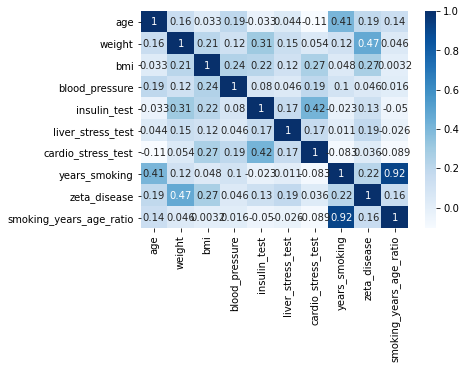

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,smoking_years_age_ratio
age,1.000000,0.156757,0.032931,0.193456,-0.032752,0.043768,-0.106328,0.408528,0.191643,0.141333
weight,0.156757,1.000000,0.213127,0.122610,0.305686,0.147622,0.053537,0.115022,0.470668,0.045813
bmi,0.032931,0.213127,1.000000,0.241615,0.219466,0.118172,0.265110,0.047678,0.270414,0.003243
blood_pressure,0.193456,0.122610,0.241615,1.000000,0.080307,0.046342,0.193271,0.102260,0.045914,0.016127
insulin_test,-0.032752,0.305686,0.219466,0.080307,1.000000,0.173443,0.418698,-0.022908,0.128143,-0.049817
liver_stress_test,0.043768,0.147622,0.118172,0.046342,0.173443,1.000000,0.172341,0.010586,0.186091,-0.026133
cardio_stress_test,-0.106328,0.053537,0.265110,0.193271,0.418698,0.172341,1.000000,-0.083488,0.035956,-0.089444
years_smoking,0.408528,0.115022,0.047678,0.102260,-0.022908,0.010586,-0.083488,1.000000,0.218728,0.917819
zeta_disease,0.191643,0.470668,0.270414,0.045914,0.128143,0.186091,0.035956,0.218728,1.000000,0.158403
smoking_years_age_ratio,0.141333,0.045813,0.003243,0.016127,-0.049817,-0.026133,-0.089444,0.917819,0.158403,1.000000


In [11]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,cmap="Blues")
plt.show()
df.corr()

In [12]:
X=df.drop(['zeta_disease'], axis=1)
Y=df['zeta_disease']
X.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,smoking_years_age_ratio
0,54,189,27.1,80,0,1.5038,0,10,0.185185
1,23,150,38.5,68,71,0.3868,55,2,0.086957
2,47,186,29.9,90,0,0.2728,0,7,0.148936
3,18,150,30.8,70,1033,0.6598,56,0,0.000000
4,24,160,32.4,74,125,0.7608,59,2,0.083333


In [13]:
print(df['bmi'].value_counts().nlargest(5))
print(df['blood_pressure'].value_counts().nlargest(12))
print(df['insulin_test'].value_counts().nlargest(5))
print(df['cardio_stress_test'].value_counts().nlargest(5))

31.2    13
32.0    13
33.3    13
31.6    12
0.0     11
Name: bmi, dtype: int64
70    61
74    52
72    49
78    45
64    44
68    44
76    43
80    41
60    39
62    38
0     35
66    32
Name: blood_pressure, dtype: int64
0      370
105     11
94      11
140      9
120      9
Name: insulin_test, dtype: int64
0     227
62     31
60     29
53     25
58     24
Name: cardio_stress_test, dtype: int64


In [14]:
from sklearn.impute import KNNImputer

nan = 0
imputer = KNNImputer(missing_values=0,n_neighbors=3, weights="uniform")
dfTrans=imputer.fit_transform(X)

In [15]:
dfTrans

array([[5.40000000e+01, 1.89000000e+02, 2.71000000e+01, ...,
        5.40000000e+01, 1.00000000e+01, 1.85185185e-01],
       [2.30000000e+01, 1.50000000e+02, 3.85000000e+01, ...,
        5.50000000e+01, 2.00000000e+00, 8.69565217e-02],
       [4.70000000e+01, 1.86000000e+02, 2.99000000e+01, ...,
        6.10000000e+01, 7.00000000e+00, 1.48936170e-01],
       ...,
       [2.70000000e+01, 1.66000000e+02, 2.56000000e+01, ...,
        4.83333333e+01, 5.00000000e+00, 1.85185185e-01],
       [1.09000000e+02, 1.39000000e+02, 2.81000000e+01, ...,
        5.30000000e+01, 1.00000000e+00, 9.17431193e-03],
       [2.60000000e+01, 1.96000000e+02, 2.97000000e+01, ...,
        6.13333333e+01, 1.00000000e+00, 3.84615385e-02]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(dfTrans, Y,stratify=Y, test_size = 0.3, random_state = 101)
logmodel = LogisticRegression( max_iter=400)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [17]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       156
           1       0.74      0.63      0.68        84

    accuracy                           0.79       240
   macro avg       0.78      0.75      0.76       240
weighted avg       0.79      0.79      0.79       240



array([[137,  19],
       [ 31,  53]], dtype=int64)

In [18]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.17%


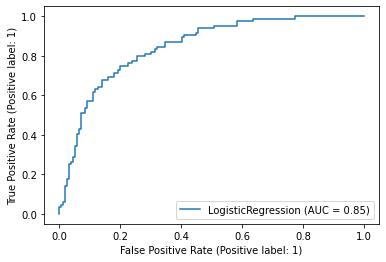

In [19]:
from sklearn import datasets, metrics
metrics.plot_roc_curve(logmodel, X_test, y_test)  
plt.show() 

In [20]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [22]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.92%


In [23]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       156
           1       0.68      0.69      0.69        84

    accuracy                           0.78       240
   macro avg       0.76      0.76      0.76       240
weighted avg       0.78      0.78      0.78       240



array([[129,  27],
       [ 26,  58]], dtype=int64)

In [24]:
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, y_train, y_test = train_test_split(df.drop('zeta_disease', axis=1), Y,stratify=Y, test_size = 0.3, random_state = 101)

random_forest = RandomForestClassifier(n_estimators=500, random_state=2019).fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.7833333333333333


In [25]:
df.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,smoking_years_age_ratio
0,54,189,27.1,80,0,1.5038,0,10,0,0.185185
1,23,150,38.5,68,71,0.3868,55,2,0,0.086957
2,47,186,29.9,90,0,0.2728,0,7,0,0.148936
3,18,150,30.8,70,1033,0.6598,56,0,0,0.000000
4,24,160,32.4,74,125,0.7608,59,2,0,0.083333


In [26]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

recall_score(y_test, y_pred)

0.6785714285714286

In [27]:
from imblearn.combine import SMOTETomek

cc = SMOTETomek(random_state=3)
X_res, y_res = cc.fit_resample(X_train, y_train)

random_forest = RandomForestClassifier(n_estimators=500, random_state=2019).fit(X_res, y_res)
y_pred = random_forest.predict(X_test)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print('Recall score: ' + str(recall_score(y_test, y_pred)))

Accuracy score: 0.7875
Recall score: 0.7976190476190477


In [28]:
import eli5
from eli5.sklearn import PermutationImportance

permumtation_impor = PermutationImportance(random_forest, random_state=3).fit(X_test, y_test)
eli5.show_weights(permumtation_impor, feature_names = X_test.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.1350 ± 0.0467,weight
0.0500 ± 0.0129,bmi
0.0425 ± 0.0143,age
0.0258 ± 0.0271,liver_stress_test
0.0150 ± 0.0085,insulin_test
0.0133 ± 0.0097,blood_pressure
0.0083 ± 0.0204,smoking_years_age_ratio
0.0083 ± 0.0053,years_smoking
-0.0042 ± 0.0158,cardio_stress_test


In [ ]:
row_to_show = 10
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


random_forest.predict_proba(data_for_prediction_array)

array([[0.25, 0.75]])

In [ ]:
import shap

explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

In [ ]:
row_to_show = 4
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


random_forest.predict_proba(data_for_prediction_array)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
dft['smoking_years_age_ratio']=dft['years_smoking']/dft['age']
predictions = logmodel.predict(dft.drop('zeta_disease', axis=1))

In [ ]:
type(predictions)

In [ ]:
dft['zeta_disease']=predictions.tolist()

In [ ]:
output=dft.drop('smoking_years_age_ratio', axis=1)
output.head()

In [ ]:
output.to_csv('output.csv', index=False)